In [210]:
import numpy as np
import matplotlib.pyplot as plt
import gc, random, math, time, matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,8)
matplotlib.rcParams['font.size']=11

def perf(f):
    s = time.perf_counter()
    f()
    return (time.perf_counter()-s)

def compare(f1,f2,iterations=50000,f1_label="NumPy",maxval=1,f2_label="Python",title=""):
    gc.collect()
    f1_time, f2_time = [], []
    for i in range(iterations):
        f1_time.append(perf(f1))
        f2_time.append(perf(f2))
    hack = sorted(f1_time)[:-1]
    plt.hist(f1_time,linewidth=3,bins=100,density=True,range=(0,maxval),histtype="step",label=f1_label)
    plt.hist(f2_time,linewidth=3,bins=100,density=True,range=(0,maxval),histtype="step",label=f2_label)
    plt.title(title)
    plt.xlim(0,maxval)
    plt.xlabel("Fractional seconds")
    plt.ylabel("Probability density")
    plt.grid()
    plt.legend()
    print("%s %s (average): %.12f ± %.12f"%(f1_label,title.lower(),np.mean(f1_time),np.std(f1_time)/math.sqrt(len(f1_time))))
    print("%s %s (average): %.12f ± %.12f"%(f2_label,title.lower(),np.mean(f2_time),np.std(f2_time)/math.sqrt(len(f2_time))))

NumPy empty array creation time (average): 0.000010280105 ± 0.000000102351
Python empty array creation time (average): 0.000001090610 ± 0.000000124228


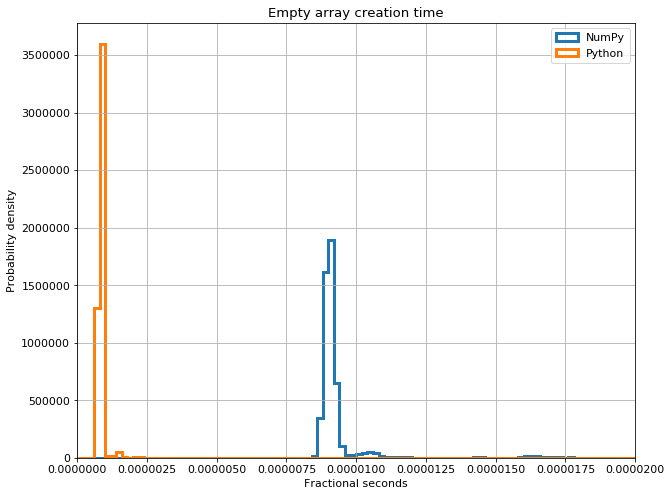

In [212]:
def ndarray_creation():
    np_arr = np.ndarray(0,dtype=float)

def list_creation():
    py_list = []
    
compare(ndarray_creation,list_creation,maxval=0.00002,title="Empty array creation time")

NumPy array append time (average): 0.000057415237 ± 0.000000711436
Python array append time (average): 0.000001027684 ± 0.000000021450


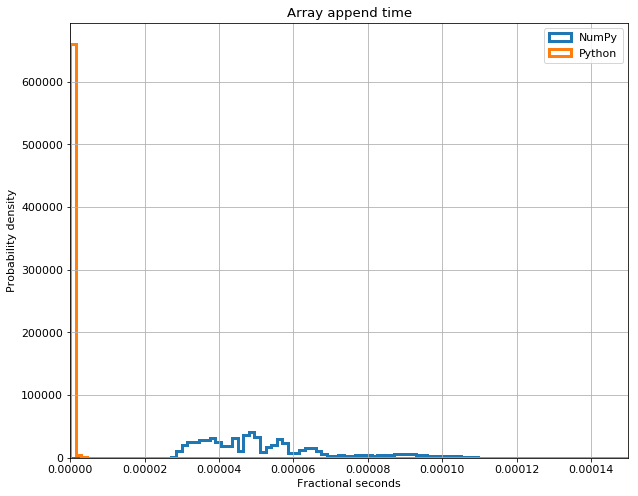

In [214]:
np_arr = np.ndarray(0,dtype=float)
py_list = []

def ndarray_append():
    global np_arr
    np_arr = np.append(np_arr,3.1416)

def list_append():
    global py_list
    py_list.append(3.1416)
    
compare(ndarray_append,list_append,maxval=0.00015,title="Array append time")

NumPy array access time (average): 0.000001224846 ± 0.000000005796
Python array access time (average): 0.000000732706 ± 0.000000005044


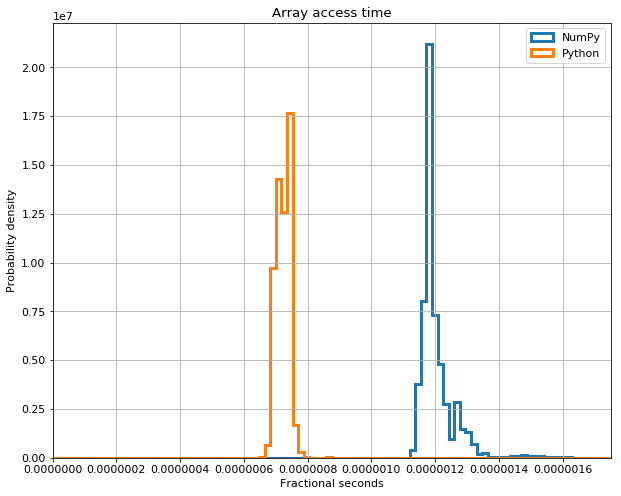

In [216]:
np_arr = np.ndarray(0,dtype=float)
py_list = []

for i in range(10000):
    r = random.random()
    np_arr = np.append(np_arr,r)
    py_list.append(r)

def ndarray_access():
    global np_arr
    b = np_arr[4999]

def list_access():
    global py_list
    b = py_list[4999]

compare(ndarray_access,list_access,maxval=0.00000175,title="Array access time")

NumPy array replace time (average): 0.000001240996 ± 0.000000006255
Python array replace time (average): 0.000000737121 ± 0.000000018742


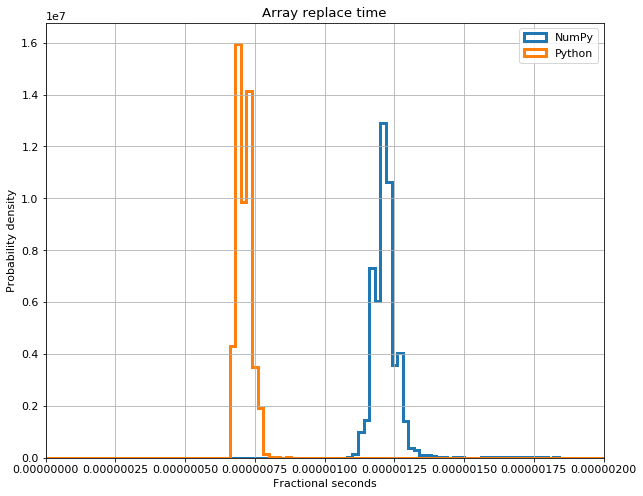

In [217]:
np_arr = np.ndarray(0,dtype=float)
py_list = []

for i in range(100000):
    r = random.random()
    np_arr = np.append(np_arr,r)
    py_list.append(r)

def ndarray_replace():
    global np_arr
    np_arr[4999] = 0

def list_replace():
    global py_list
    py_list[4999] = 0

compare(ndarray_replace,list_replace,maxval=0.000002,title="Array replace time")

NumPy array remove time (average): 0.000156359900 ± 0.000001031211
Python array remove time (average): 0.000225954321 ± 0.000001196212


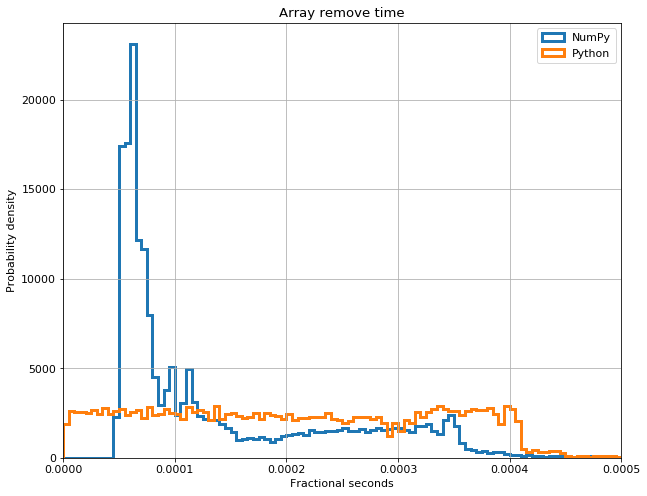

In [218]:
np_arr = np.ndarray(0,dtype=float)
py_list = []

for i in range(50000):
    r = random.random()
    np_arr = np.append(np_arr,r)
    py_list.append(r)

def ndarray_remove():
    global np_arr
    np_arr = np.delete(np_arr,0)

def list_remove():
    global py_list
    del py_list[0]

compare(ndarray_remove,list_remove,maxval=0.0005,title="Array remove time")

NumPy array insertion time (average): 0.000266911772 ± 0.000002282111
Python array insertion time (average): 0.000085619267 ± 0.000001175029


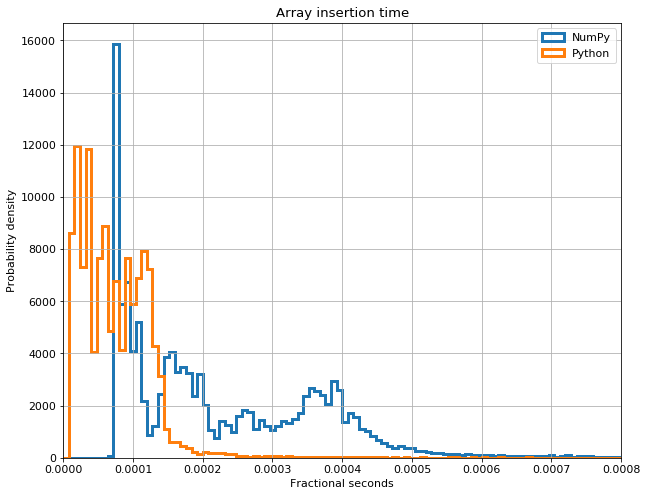

In [219]:
np_arr = np.ndarray(0,dtype=float)
py_list = []

for i in range(10000):
    r = random.random()
    np_arr = np.append(np_arr,r)
    py_list.append(r)

def ndarray_insert():
    global np_arr
    np_arr = np.insert(np_arr,4999,3.1416)

def list_insert():
    global py_list
    py_list.insert(4999,3.1416)

compare(ndarray_insert,list_insert,maxval=0.0008,title="Array insertion time")

NumPy array reverse by slice time (average): 0.000003657080 ± 0.000000177169
Python array reverse by slice time (average): 0.000114654733 ± 0.000001320804


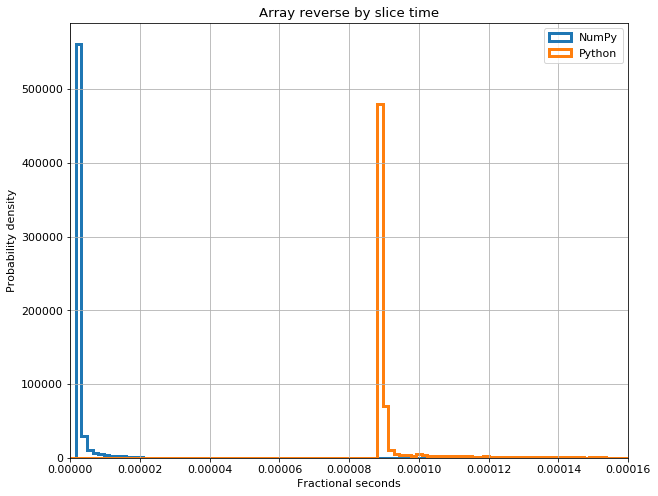

In [220]:
np_arr = np.ndarray(0,dtype=float)
py_list = []

for i in range(10000):
    r = random.random()
    np_arr = np.append(np_arr,r)
    py_list.append(r)

def ndarray_reverse():
    global np_arr
    np_arr = np_arr[::-1]

def list_reverse():
    global py_list
    py_list = py_list[::-1]

compare(ndarray_reverse,list_reverse,maxval=0.00016,title="Array reverse by slice time")

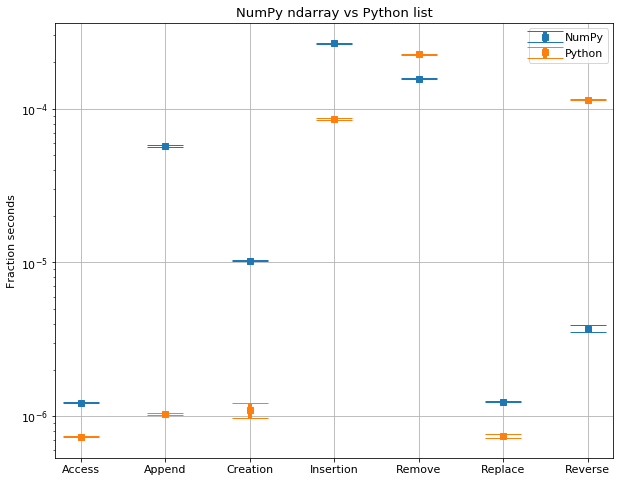

In [229]:
# These are MY results! 

tit = ["Creation","Append","Access","Replace","Remove","Insertion","Reverse"]

np_r = [0.00001028,0.0000574,0.000001225,0.000001241,0.0001564,0.000267,0.0000037]
np_e = [0.00000010,0.0000007,0.000000006,0.000000006,0.0000010,0.000002,0.0000002]

py_r = [0.00000109,0.00000103,0.000000733,0.00000074,0.0002260,0.0000856,0.0001146]
py_e = [0.00000012,0.00000002,0.000000005,0.00000002,0.0000012,0.0000012,0.0000013]

plt.errorbar(tit,np_r,yerr=np_e,fmt="s",capsize=18,linewidth=4,label="NumPy")
plt.errorbar(tit,py_r,yerr=py_e,fmt="s",capsize=18,linewidth=4,label="Python")
plt.title("NumPy ndarray vs Python list")
plt.ylabel("Fraction seconds")
plt.yscale("log")
plt.grid()
plt.legend()